<a href="https://colab.research.google.com/github/Tilence/assignment/blob/main/Finalassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn import model_selection, metrics  #to include metrics for evaluation # this used to be cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline


In [ ]:
# Read the data and view the top portion to see what we are dealing with.
data= pd.read_csv("Telco-Customer-Churn.csv")[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']]
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#data.isnull().sum().sum()
data[data['TotalCharges'].isna()==True]=0
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
#create a labelencoder object
le = LabelEncoder()
#Label Encoding will be used for columns with 2 or less unique
#values
le_count = 0
for col in data.columns[1:]:
  if data[col].dtype=='int64':
    if len(list(data[col].unique()))>= 2:
      le.fit(data[col])
      data[col] = le.transform(data[col])
      le_count += 1
print('{}columns were label encoded.'.format(le_count))

  

18columns were label encoded.


In [ ]:
#create a labelencoder object
le = LabelEncoder()
#Label Encoding will be used for columns with 2 or less unique
#values
le_count = 0
for col in data.columns[1:]:
  if data[col].dtype=='float64':
    if len(list(data[col].unique()))>= 2:
      le.fit(data[col])
      data[col] = le.transform(data[col])
      le_count += 1
print('{}columns were label encoded.'.format(le_count))

  

1columns were label encoded.


In [ ]:
#create a labelencoder object
le = LabelEncoder()
#Label Encoding will be used for columns with 2 or less unique
#values
le_count = 0
for col in data.columns[1:]:
  if data[col].dtype=='int64':
    if len(list(data[col].unique()))<= 2:
      le.fit(data[col])
      data[col] = le.transform(data[col])
      le_count += 1
print('{}columns were label encoded.'.format(le_count))

  

6columns were label encoded.


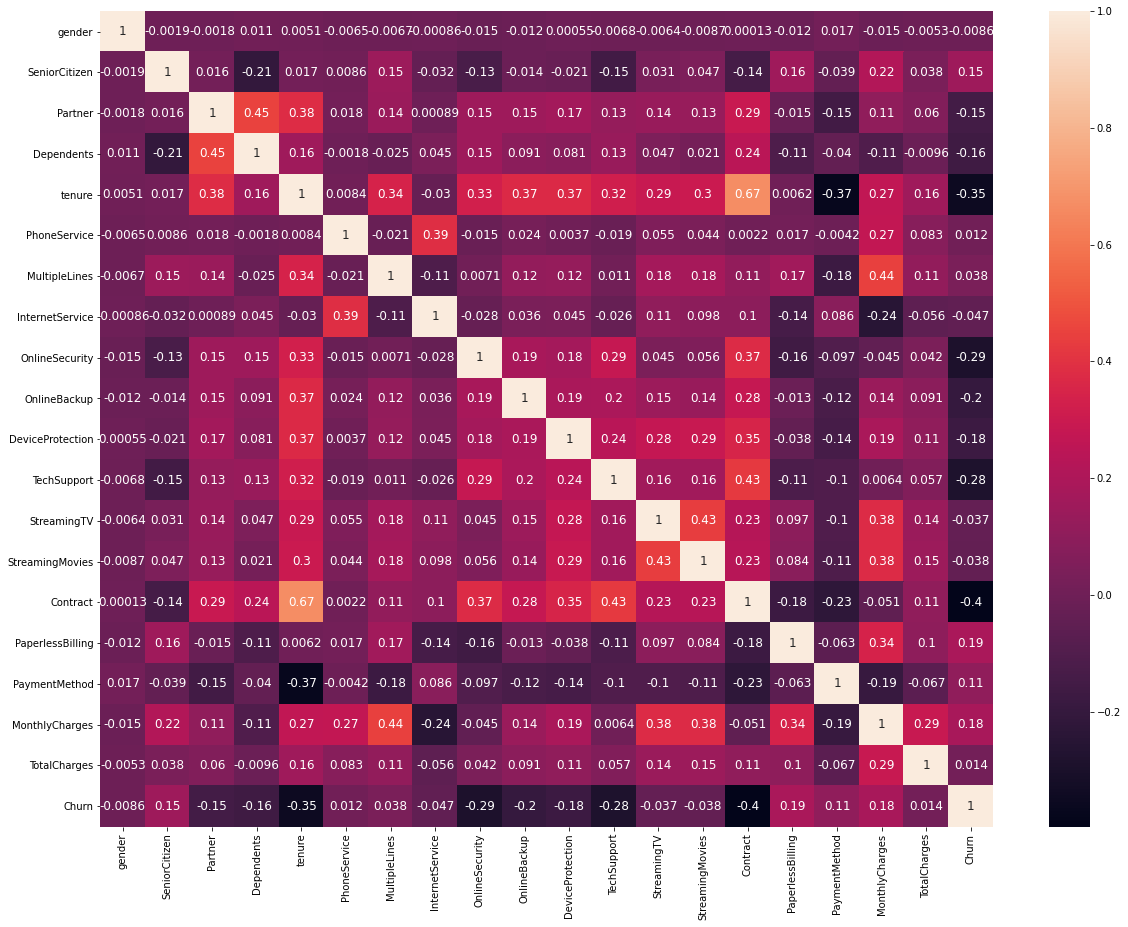

In [ ]:
#relationships between customer data and churn using correlation.
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
data.pop('TotalCharges')

0       2505
1       1466
2        157
3       1400
4        925
        ... 
7038    1597
7039    5698
7040    2994
7041    2660
7042    5407
Name: TotalCharges, Length: 7043, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int64
 1   SeniorCitizen     7043 non-null   int64
 2   Partner           7043 non-null   int64
 3   Dependents        7043 non-null   int64
 4   tenure            7043 non-null   int64
 5   PhoneService      7043 non-null   int64
 6   MultipleLines     7043 non-null   int64
 7   InternetService   7043 non-null   int64
 8   OnlineSecurity    7043 non-null   int64
 9   OnlineBackup      7043 non-null   int64
 10  DeviceProtection  7043 non-null   int64
 11  TechSupport       7043 non-null   int64
 12  StreamingTV       7043 non-null   int64
 13  StreamingMovies   7043 non-null   int64
 14  Contract          7043 non-null   int64
 15  PaperlessBilling  7043 non-null   int64
 16  PaymentMethod     7043 non-null   int64
 17  MonthlyCharges    7043 non-null  

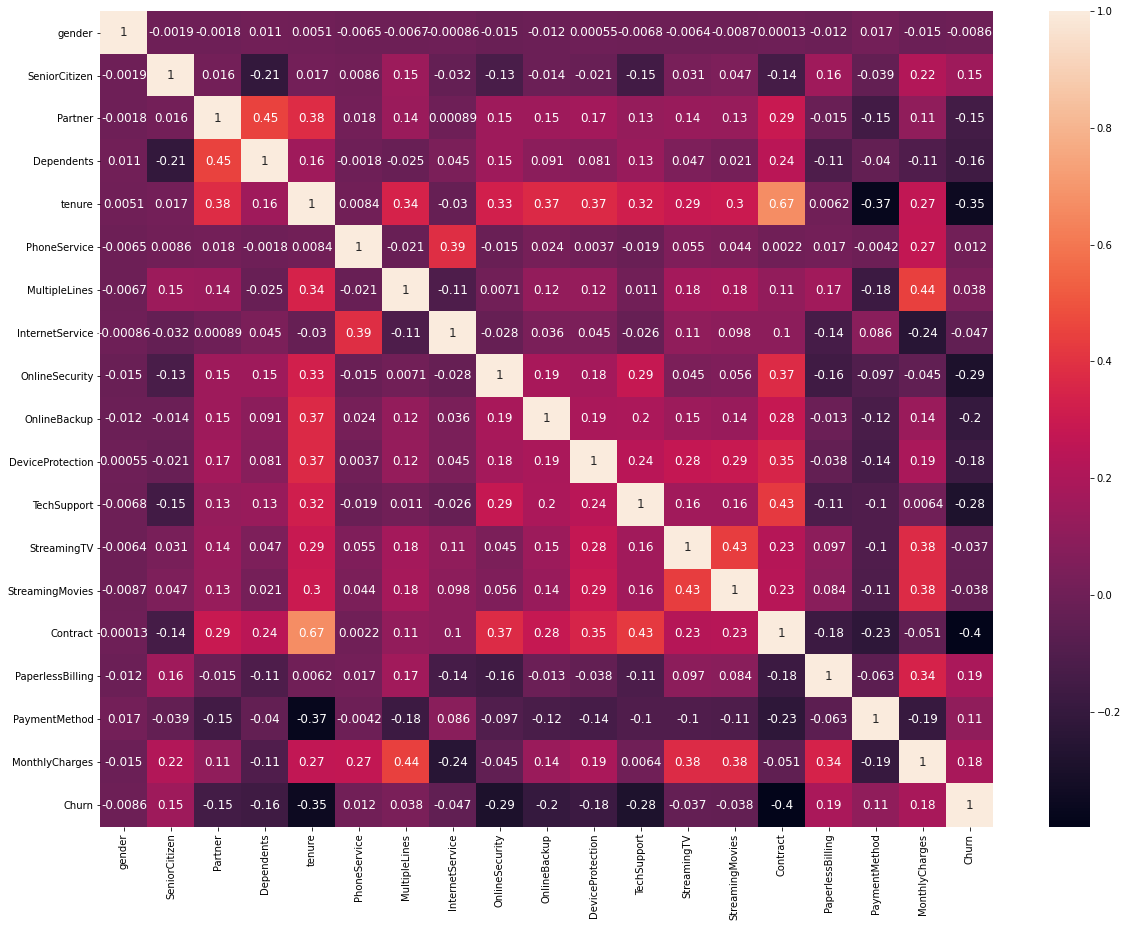

In [ ]:
#run without totalcharges
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

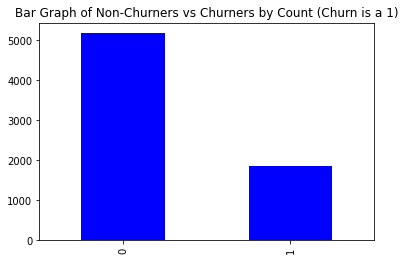

In [ ]:
# This creates a bar graph of churn (Yes vs. No) so we can check how the data is balanced.
data['Churn'].value_counts().plot(kind = 'bar', title = 'Bar Graph of Non-Churners vs Churners by Count (Churn is a 1)', color = 'blue', align = 'center')
plt.show()
 

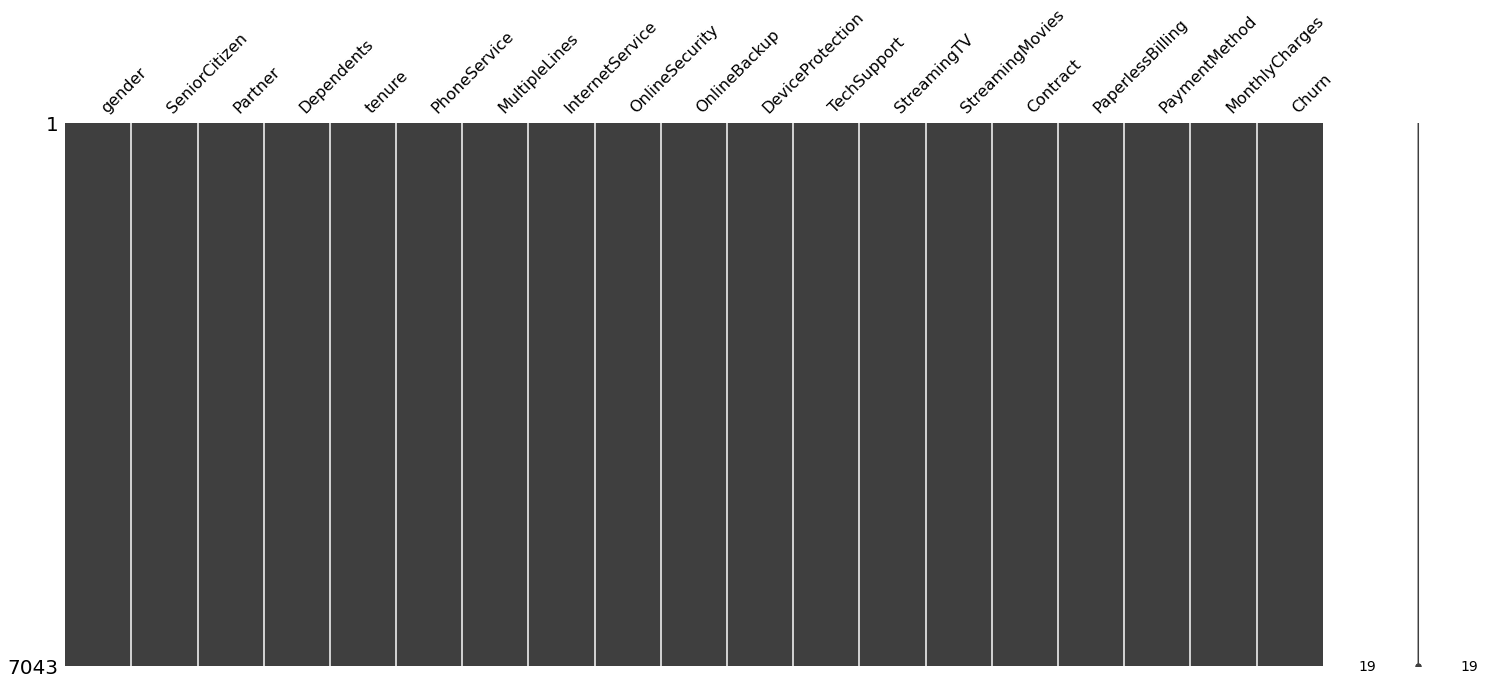

In [ ]:
# Check the data health. The sections should all be completely black indicating the data is complete.
ms.matrix(data)

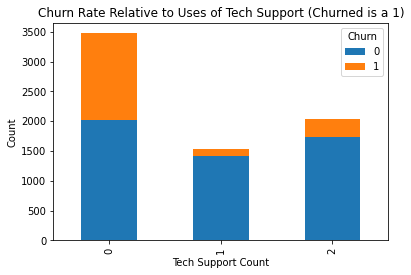

In [ ]:
# Explore the relationship between instances of Tech Support and Churn. 
# Stacked Bar of Tech Support and Churn.
tech_support_churn = pd.crosstab(data['TechSupport'], data['Churn'])
tech_support_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Tech Support Count')
plt.title('Churn Rate Relative to Uses of Tech Support (Churned is a 1)')
plt.show()

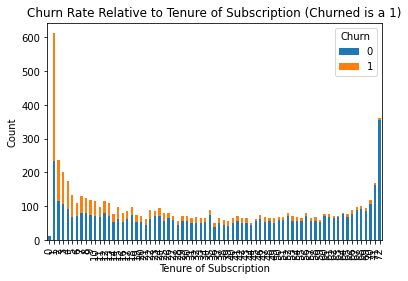

In [ ]:
# Churn rate relative to tenure.
# Stacked bar of tenure and churn.
tenure_churn = pd.crosstab(data['tenure'], data['Churn'])
tenure_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Tenure of Subscription')
plt.title('Churn Rate Relative to Tenure of Subscription (Churned is a 1)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


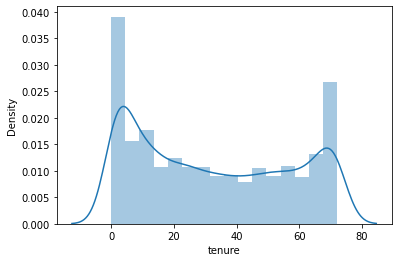

In [ ]:
# Plot the distribution of observations for tenure.
sns.distplot(data['tenure']);

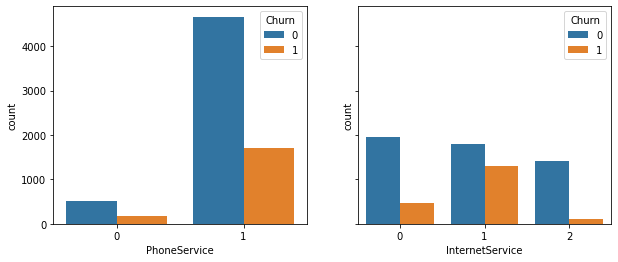

In [ ]:
# See if the other products they have from this company has to do with their churn.
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4)) 
sns.countplot(x='PhoneService', hue='Churn',
              data=data, ax=axes[0]);
sns.countplot(x='InternetService', hue='Churn',
              data=data, ax=axes[1]);

In [ ]:
# Splitting the data for testing and training.
X_train, X_test, y_train, y_test = train_test_split(data.drop('Churn',axis=1), 
                                                    data['Churn'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
train=pd.concat([X_train,y_train],axis=1)

In [ ]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        #to get the parameters of xgboost
        xgb_param = alg.get_xgb_params() 
        
        #to convert into a datastructure internally used by xgboost for training efficiency 
        # and speed
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        
        #xgb.cv is used to find the number of estimators required for the parameters 
        # which are set
        cvresult = xgb.cv(xgb_param, xgtrain, 
                          num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                        metrics='auc', early_stopping_rounds=early_stopping_rounds)
        
        #setting the n_estimators parameter using set_params
        alg.set_params(n_estimators=cvresult.shape[0])
        
        print(alg.get_xgb_params())
        #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Churn'],eval_metric='auc')
    
    return alg
    

In [ ]:
def get_accuracy(alg,predictors):
    dtrain_predictions = alg.predict(X_test[predictors])
    dtrain_predprob = alg.predict_proba(X_test[predictors])[:,1]
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_test.values, 
                                                      dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test.values, 
                                                           dtrain_predprob))

In [ ]:
def get_feature_importances(alg):
    #to get the feature importances based on xgboost we use fscore
    feat_imp = pd.Series(alg._Booster.get_fscore()).sort_values(ascending=False)
    print(feat_imp)
    
    #this shows the feature importances on a bar chart
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [ ]:
def accept_user_data():
    gender = st.selectbox('Gender',('Male','Female'))
    seniorcitizen = st.selectbox('SeniorCitizen',('Yes','No'))
    internetService = st.selectbox('Internet Service',('Fiber Optic','DSL','No Internet Service'))
    paymentMethod = st.selectbox('Payment Method',('Electronic Cheque','Mailed Cheque','Bank Transfer (Automatic)','Credit Card (Automatic)'))
    tenure = st.number_input('Tenure')
    monthlyCharge = st.number_input('Monthly Charge')
    # making changes to match label encoded data in the dataframe
    if(gender=='Male'):
        gender = 1
    elif(gender=='Female'):
        gender=0
    if(seniorcitizen=='Yes'):
        seniorcitizen = 1
    elif(seniorcitizen=='No'):
        seniorcitizen=0
    if(internetService=='Fiber Optic'):
        internetService = 1
    elif(internetService=='DSL'):
        internetService = 2
    else:
        internetService = 0
    if(paymentMethod=='Electronic Cheque'):
        paymentMethod = 0
    elif(paymentMethod=='Mailed Cheque'):
        paymentMethod = 2
    elif(paymentMethod=='Bank Transfer (Automatic)'):
        paymentMethod = 1
    else:
        paymentMethod = 3
    # store all the variables in a numpy array
    user_data = np.array([gender,seniorcitizen,internetService,paymentMethod,tenure,monthlyCharge]).reshape(1,-1)
    return user_data

In [ ]:
def main():
    # loading the data
    data = load_data()
    Xtrain,Xtest,ytrain,ytest,label_encoder = preprocess(data)
    accuracy, auc_score = xgbclassifier(Xtrain,Xtest,ytrain,ytest)
    # loading the presaved model
    pickle_out = open('xgb_model.pkl', "rb")
    model = pickle.load(pickle_out)
    pickle_out.close()

In [ ]:
!pip install streamlit

In [ ]:
import streamlit as st

In [ ]:
st.title("Introduction to building in Streamlit")
st.sidebar.title("This is the sidebar")
st.sidebar.markdown("Let's start with an XGBoost")


2021-06-10 21:29:22.857 WARNING root: 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=1, _provided_cursor=None, _parent=DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None), _block_type=None, _form_data=None)

In [ ]:
if(st.checkbox("Display data", False)):
        st.subheader("Showing data now...")
        st.write(f'The dataset has a shape of {data.shape}')
        st.write(data.head())

In [ ]:
if(st.checkbox("Display metrics summary")):
        st.subheader("Display XGB Classifier metrics...")
        st.write("Model Accuracy : ", accuracy.round(2))
        st.write("Auc Score : ", auc_score)

In [ ]:
if(st.checkbox("Want to input your own data? Tick if yes")):
        user_data = accept_user_data()
        if st.button("Classify"):
            prediction = model.predict(user_data)
            pred = label_encoder.inverse_transform(prediction)
            success_string = f"Classification result : {pred}"
            st.write("Is the customer likely to churn?")
            st.success(success_string)

In [ ]:
if __name__ == "__main__":
    main()